In [51]:
import numpy as np
import librosa
import random
import matplotlib.pyplot as plt
import math
import fractional_fourier_transform

In [55]:
N = 1024
signal = np.array([(i*0.1)*math.sin(i*0.01) + math.cos(i * 0.2) for i in range(N)])

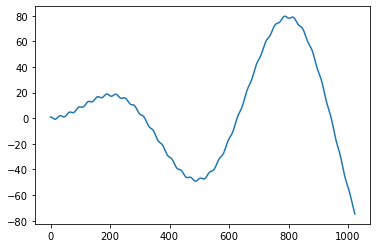

In [41]:
plt.plot(
    list(range(N)),
    signal
)
plt.show()

In [42]:
fftResult = np.fft.fft(signal)
rfftResult = np.fft.rfft(signal)

In [43]:
fftResult.shape

(1024,)

In [44]:
rfftResult.shape

(513,)

In [45]:
np.allclose(fftResult[:513], rfftResult)

True

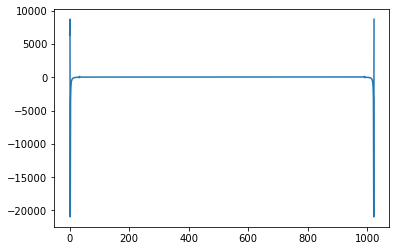

In [46]:
plt.plot(
    list(range(N)),
    fftResult.real
)

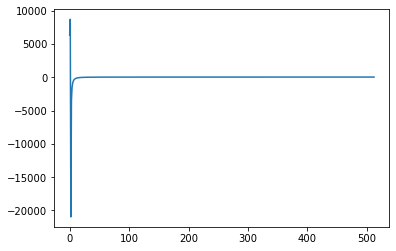

In [24]:
plt.plot(
    list(range(N//2+1)),
    rfftResult.real
)

In [27]:
a = np.array(list(range(10)))

In [50]:
fftResult[2]

(-20966.63087454629-1916.263128667525j)

In [49]:
fftResult[-2]

(-20966.63087454629+1916.2631286675244j)

In [56]:
rfftResult = np.fft.rfft(signal)

In [57]:
transformer = fractional_fourier_transform.FractionalFourierTransform()

In [59]:
myRes = transformer.rfrft(signal, 1)

In [60]:
np.allclose(myRes, rfftResult)

True

In [61]:
class fftCallable:
    @staticmethod
    def rfft(a, n = None, axis = -1):
        return transformer.rfrft(a, 1, n=n , axis=axis)

In [63]:
librosa.set_fftlib = fftCallable

In [68]:
res = librosa.stft(signal, win_length= N // 100)

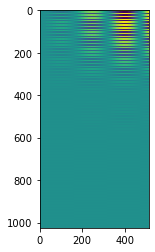

In [69]:
plt.imshow(res.real)